<a href="https://colab.research.google.com/github/urness/CS167Fall2025/blob/main/Day03_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day03
## 🐼 Pandas Tutorial

#### CS167: Machine Learning, Fall 2025


## Overview of Pandas Tutorial

Three main goals:
1. __Overview__ of Pandas
    - Datatypes `DataFrame` and `Series`
    - helpful functions
2. Select __columns__ in DataFrames
3. Select __rows__ in DataFrames
4. Select __subsets__ of the DataFrame (both rows and columns).

##  Pandas Datatypes: `DataFrame` and `Series`

In `pandas`,there are two main datatypes, `DataFrame` and `Series`:

Let's start with `DataFrame`

[Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) defines `DataFrames` as:
> Two-dimensional, size-mutable, potentially heterogeneous tabular data.

- basically, think of `DataFrames` as our excel sheets--two dimensional, tabular data.
- Each column has a name, and you can use these names to filter and create subsets of data.
- often, you'll see `DataFrames` abbreviated to `df`.

## Creating a DataFrame using `pd.read_csv()`:
While you can create a DataFrame from scratch, most often we'll be importing data from a `.csv` file:
- pandas has a helpful function for this: `pd.read_csv()`, which takes the path to the csv file as an argument [[documentation]](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [ ]:
import pandas as pd

# The first step is to mount your Google Drive to your Colab account.
#You will be asked to authorize Colab to access your Google Drive. Follow the steps they lead you.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change this path to point to where your data is:
restaurant_data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/restaurant.csv')
print("data is a ", type(restaurant_data))

data is a  <class 'pandas.core.frame.DataFrame'>


## Other ways of creating DataFrames:
The syntax for creating a DataFrame from scratch looks like this:
- `pandas.DataFrame(data, index, columns)`


In [ ]:
df = pd.DataFrame() #creates an empty dataframe
df

""


# Creating a DataFrame from a list:

In [ ]:
# initialize list elements
data = [10,20,30,40,50,60]

# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Numbers'])

# print dataframe.
df

,Numbers
0,10
1,20
2,30
3,40
4,50
5,60


## Creating DataFrame from 2D list:

In [ ]:
# initialize list of lists
data = [['tom', 89], ['juan', 99], ['juli', 93]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Score'])

# print dataframe.
df

,Name,Score
0,tom,89
1,juan,99
2,juli,93


##Columns Names
Want to see a list of all of the columns in your dataset? Try using `df.columns`

In [ ]:
col = restaurant_data.columns
col

Index(['alt', 'bar', 'fri', 'hun', 'pat', 'price', 'rain', 'res', 'type',
       'est', 'target'],
      dtype='object')

## Pandas Datatypes: `Series`
- `Series` are 1D arrays with axis labels.
    - Each __row__ in a DataFrame is a `Series`.
    - Each __column__ in a DataFrame is also a `Series`.

#Selecting Columns

# Subsetting Columns
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_subset_cols.png?raw=1"/ width=600>
</div>

###Why might we want a subset of the columns of a DataFrame?

Sometimes you don't need all of the columns and just want to work with a subset of the colummns of the original dataset. Other times, you may want to reorder the columns in your dataset.

Here's how you would do either of those:
The syntax for subsetting columns from a DataFrame (`df`) is:
- One column: `df['column_name']`
- Multiple columns: `df[['column1', 'column2', 'column3']]`

In [ ]:
restaurant_data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/restaurant.csv') #entire data frame
prices = restaurant_data['price'] #series
col_subset = restaurant_data[['rain', 'hun','target']] #data frame with 3 columns
col_subset

,rain,hun,target
0,No,Yes,Yes
1,No,Yes,No
2,No,No,Yes
3,No,Yes,Yes
4,No,No,No
5,Yes,Yes,Yes
6,Yes,No,No
7,Yes,Yes,Yes
8,Yes,No,No
9,No,Yes,No


If there are no spaces in the name of a column, you can also reference it using dot notation like so:

In [ ]:
restaurant_data.fri

,fri
0,No
1,No
2,No
3,Yes
4,Yes
5,No
6,No
7,No
8,Yes
9,Yes


## Subsetting Rows in a DataFrame:
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_subset_rows.png?raw=1"/ width=600>
</div>
Why might you want a subset of the rows?

Maybe you want only rows that satisfy a certain condition--in the restaurant dataset, maybe:
- Italian Restaurants
- only examples when it didn't rain
- etc.

To understand the syntax for subsetting rows in a DataFrame, we need to understand how conditionals work in Python/Pandas:
- to check whether each row in a dataframe meets a criteria, you can use the following syntax

    `df['column_name']` == `True`/`False`

- it will return a `Series` with `True`/`False` values, where rows that are `True` meet the criteria, and `False` do not.

In [ ]:
restaurant_data['type'] == 'French'

,type
0,True
1,False
2,False
3,False
4,True
5,False
6,False
7,False
8,False
9,False


In [ ]:
restaurant_data['target'] == 'Yes'

,target
0,True
1,False
2,True
3,True
4,False
5,True
6,False
7,True
8,False
9,False


In [ ]:
restaurant_data

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
6,No,Yes,No,No,NaN,$,Yes,No,Burger,0-10,No
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


Taking this one step further, we can use this boolean Series to filter our rows:

- `subset_rows = df[df['column name'] == 'something']`

In [ ]:
french_restaurants = restaurant_data[restaurant_data['type'] == 'French']
french_restaurants

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


## Selecting Rows in DataFrames using `loc` and `iloc`:
Simply put:
- `loc` gets DataFrame rows and columns by __labels/names__
- `iloc` gets DataFrame rows and columns by __index/position__

In [ ]:
restaurant_data.loc[10] ### 10 is really a "name", not a number

,10
alt,No
bar,No
fri,No
hun,No
pat,NaN
price,$
rain,No
res,No
type,Thai
est,0-10


In [ ]:
restaurant_data.iloc[10] ### 10 is now an index number using iloc

,10
alt,No
bar,No
fri,No
hun,No
pat,NaN
price,$
rain,No
res,No
type,Thai
est,0-10


# When to use loc? When to use iLoc?
Consider this situation, which could get us into trouble:

In [ ]:
thai_restaurants = restaurant_data[restaurant_data['type'] == 'Thai']
thai_restaurants

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
10,No,No,No,No,NaN,$,No,No,Thai,0-10,No


In [ ]:
thai_restaurants.loc[10] #this is okay

,10
alt,No
bar,No
fri,No
hun,No
pat,NaN
price,$
rain,No
res,No
type,Thai
est,0-10


In [ ]:
thai_restaurants.iloc[10] # But this breaks, why?

IndexError: single positional indexer is out-of-bounds

In [ ]:
#another usage of iloc --- slices
restaurant_data.iloc[0:5]

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


## Subsetting Columns and Rows
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_subset_rowsandcols.png?raw=1"/ width=600>
</div>

Let's imagine we want a subset that contains the estimated wait for burger restaurants.

Technically, you have the knowledge now to be able to do this, if you just break it up into two steps
- make a subset, `burger_restaurants`, of rows where `type == 'Burger'`
- use `burger_restaurants` to create a second subset that only contains the `'est'` column.

In [ ]:
burger_restaurants = restaurant_data[restaurant_data['type'] == 'Burger']
burger_restaurants_wait = burger_restaurants['est']
burger_restaurants_wait.head()

,est
2,0-10
6,0-10
8,>60
11,30-60


But... we can actually do this on one step if we use `loc`/`iloc`:

In [ ]:
burger_restaurants_wait = restaurant_data.loc[restaurant_data.type == 'Burger', 'est'] # the first argument is the condition for the rows, the second is the columns
burger_restaurants_wait

,est
2,0-10
6,0-10
8,>60
11,30-60


# Some Handy (Statistical) Functions
- `mean()`, `median()`, `sum()`
- note that these are numerical calculations, (data must be numerical)
- results done across rows (within a single column)

In [ ]:
#load the Titanic dataframe
titanic_data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/titanic.csv') #entire data frame
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#average age of titanic passengers:
print(titanic_data.age.mean())
#note: also could be written as ----> titanic_data['age'].mean()

29.69911764705882


In [ ]:
#median ticket fare for titanic passengers:
titanic_data.fare.median()

14.4542

In [ ]:
#number of survivers
titanic_data.survived.sum()

np.int64(342)

In [ ]:
# did not survive:
total_survivers = titanic_data.survived.sum()
total_passengers = titanic_data.shape[0] ###
not_survived = total_passengers - total_survivers
print(not_survived)

549


# Some More Handy Functions
- `describe()`, `hist()`, `groupby()`, `unique()`

`describe()` – Generates descriptive statistics (mean, count, std, min, quartiles, max) for numeric columns in a DataFrame.

`hist()` – Plots histograms of numeric columns in a DataFrame.

`groupby()` – Groups DataFrame rows by specified column(s) for aggregation or transformation.

`unique()` – Returns the unique values from a Series (or column of a DataFrame).

In [ ]:
titanic_data.age.describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: >

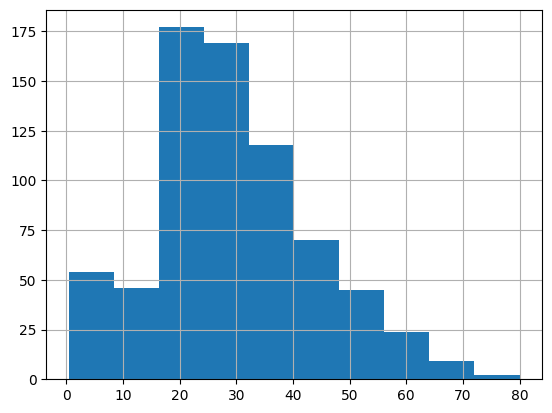

In [ ]:
titanic_data.age.hist()

In [ ]:
#get the unique values of the Deck column
titanic_data.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [ ]:
# Groups the Titanic dataset by the 'survived' column
#  (0 = did not survive, 1 = survived)
# and calculates the average age for each group.
titanic_data.groupby(['survived'])['age'].mean()

,age
survived,
0,30.626179
1,28.343690


In [ ]:
# Groups the Titanic dataset by the 'deck' column
# and calculates the average fare for each group.
titanic_data.groupby(['deck'])['fare'].mean()

,fare
deck,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250


# Multiple Conditions
What if we want to filter rows by multiple conditions?

Make sure each condition is in parentheses and use the old school `|` and `&` for operators.

In [ ]:
#women or children on titanic
women_or_children = titanic_data[(titanic_data.age < 18) | (titanic_data.sex == 'female')]
women_or_children.survived.sum()

np.int64(256)

In [ ]:
# men who survived
men_who_survived = titanic_data[(titanic_data.sex == 'male') & (titanic_data.survived == 1)]
men_who_survived.age.mean()

np.float64(27.276021505376345)

# In-Class Exercises
You have unlimited attempts to use Pandas to answer the questions and enter the results on blackboard

Create a subset of the titanic data (call the variable 'queenstown_subset') that consists only of passengers with a 'embark_town' that is "Queenstown"
hint: if you get a warning, you may need to explicitly note that you are making a copy of the original data by using the `.copy()` function

1. What is the average fare for all of those in the queenstown_subset? When entering the answer in Blackboard, you can round your answer to the nearest .01
2. What is the percentage of passengers that survived on the queenstown_subset?
3. Load the Iris dataset. What is the **median** `sepal width` of just the Setosas?

